In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from polyagamma import random_polyagamma
from utils.generate import GenerateData
from utils.generate import GenerateData_binomial
from models.proposed_method import proposed_method
from models.proposed_method import proposed_method_binomial

# 多項

特徴量 X の形状： (100, 3)
目的変数 y の形状： (100,)
クラスの分布： [50 50]


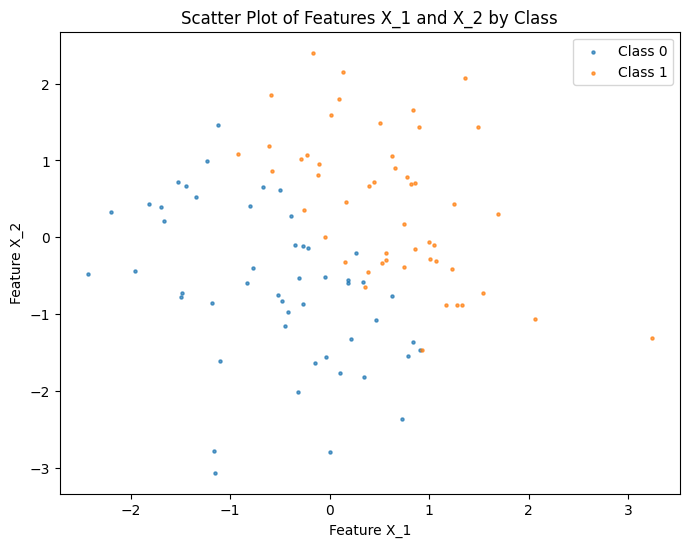

[array([0.001, 0.001, 0.001]), array([0.001, 0.001, 0.001])]
[[[1 0 0]
  [0 1 0]
  [0 0 1]]

 [[1 0 0]
  [0 1 0]
  [0 0 1]]

 [[1 0 0]
  [0 1 0]
  [0 0 1]]]
[array([[ 8.11390376, 21.45936784, 19.40689239],
       [ 8.56701847, 21.81828543, 19.53590763]]), array([[ 8.53458629, 22.0634308 , 19.87936705],
       [ 8.18884592, 21.49963572, 19.57006239]]), array([[ 7.99988464, 21.1426164 , 19.38866845],
       [ 8.37077844, 21.71723703, 20.00426077]]), array([[ 8.00012522, 21.31164551, 19.69133285],
       [ 8.04229665, 21.14399324, 19.25174515]]), array([[ 7.96135403, 20.93685267, 19.39885577],
       [ 8.01221067, 21.23945516, 19.58835651]]), array([[ 7.66281725, 21.39476321, 19.51636497],
       [ 7.72786996, 20.94302333, 19.14976164]]), array([[ 7.80188744, 20.85438224, 19.26649597],
       [ 7.17861506, 21.3980661 , 19.28611362]]), array([[ 7.14394103, 21.54659581, 19.29413838],
       [ 7.56715502, 20.96926775, 19.27134991]]), array([[ 7.43604533, 21.25167459, 19.26417094],
       [ 7

In [2]:
# 特徴量の数とクラス数を設定
n_features = 2
n_classes = 2

# 特徴量の平均と標準偏差を設定
X_mu = [0, 0]
X_sigma = [1, 1]

# パラメータの平均と標準偏差を設定（各クラスごとのリスト）
beta_mu_matrix = [
    [0, -10, 1],   # クラス0のβの平均
    [0, 3, 10],   # クラス1のβの平均
]

beta_sigma_matrix = [
    [0.1, 0.1, 0.1],    # クラス0のβの標準偏差
    [0.1, 0.1, 0.1],    # クラス1のβの標準偏差
]

# クラスをインスタンス化
generator = GenerateData(
    n_features=n_features,
    n_classes=n_classes,
    X_mu_list=X_mu,
    X_sigma_list=X_sigma,
    beta_mu_matrix=beta_mu_matrix,
    beta_sigma_matrix=beta_sigma_matrix
)

# データを生成
X, y = generator.generate_non_bias_data()

# 結果の確認
print("特徴量 X の形状：", X.shape)
print("目的変数 y の形状：", y.shape)
print("クラスの分布：", np.bincount(y))

# 2次元の散布図でクラス別で色分けして表示
plt.figure(figsize=(8, 6))
for cls in range(n_classes):
    X_cls = X[y == cls]
    plt.scatter(X_cls[:, 1], X_cls[:, 2], label=f'Class {cls}', alpha=0.7, s = 5)
plt.title('Scatter Plot of Features X_1 and X_2 by Class')
plt.xlabel('Feature X_1')
plt.ylabel('Feature X_2')
plt.legend()
plt.show()

b_0 = [np.array([0.001, 0.001, 0.001]) for _ in range(n_classes)]
print(b_0)
B_0 = np.array([np.diag([1, 1, 1])] * 3)
print(B_0)

burn = 2000
draw = 5000

# proposed_methodのインスタンスを作成
method = proposed_method(X[:1000], y[:1000], b_0, B_0, n_classes, X_mu, X_sigma, burn, draw)

# sample_betaメソッドを実行
beta_posterior = method.sample_beta()
print(beta_posterior)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 多項ロジスティック回帰モデルをインスタンス化
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, fit_intercept=False)

# モデルを訓練データで訓練
model.fit(X_train, y_train)

# パラメータを推定
estimated_beta = model.coef_
estimated_intercept = model.intercept_

print("推定されたパラメータ (beta):\n", estimated_beta)
print("推定された切片 (intercept):\n", estimated_intercept)

# テストデータで予測精度を評価
score = model.score(X_test, y_test)
print("テストデータでの正解率:", score)



推定されたパラメータ (beta):
 [[0.01900873 1.63491638 1.2411411 ]]
推定された切片 (intercept):
 [0.]
テストデータでの正解率: 0.95


/Users/abetaichi/master/Lab/research/selection_bias/for_paper/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


# 2項

yの平均: 0.540513
y_biasの平均: 0.61


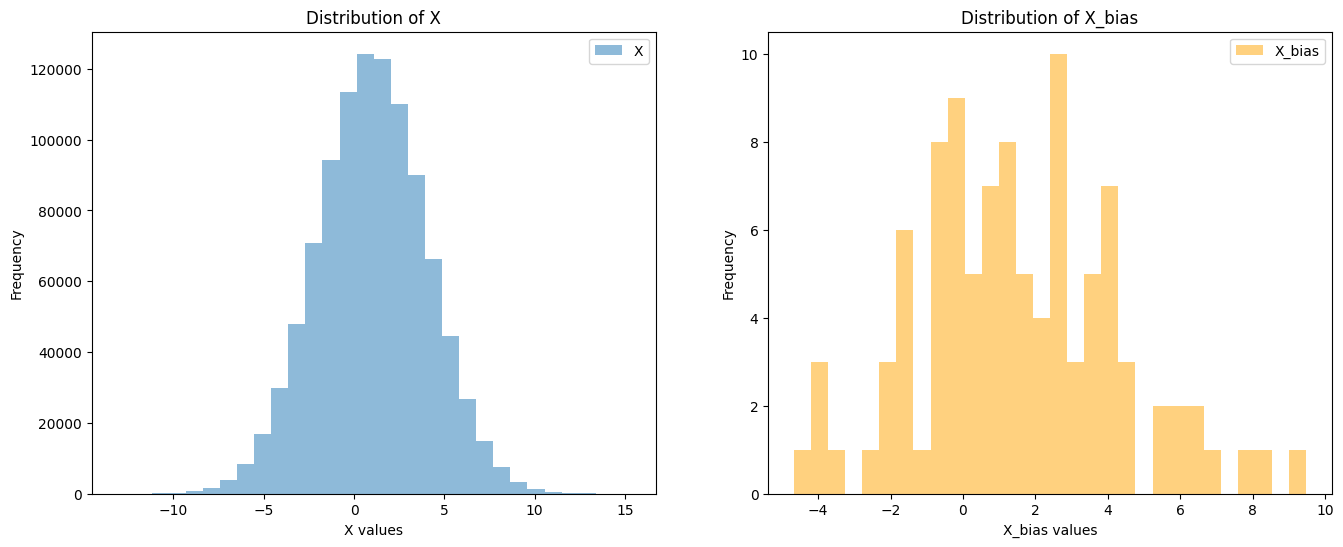

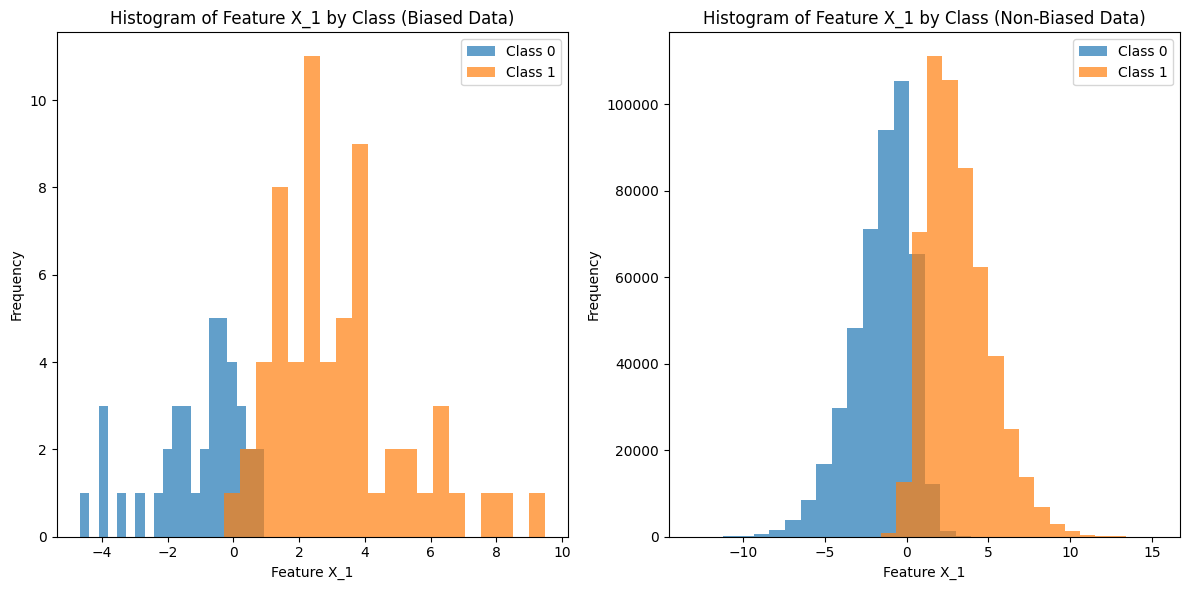

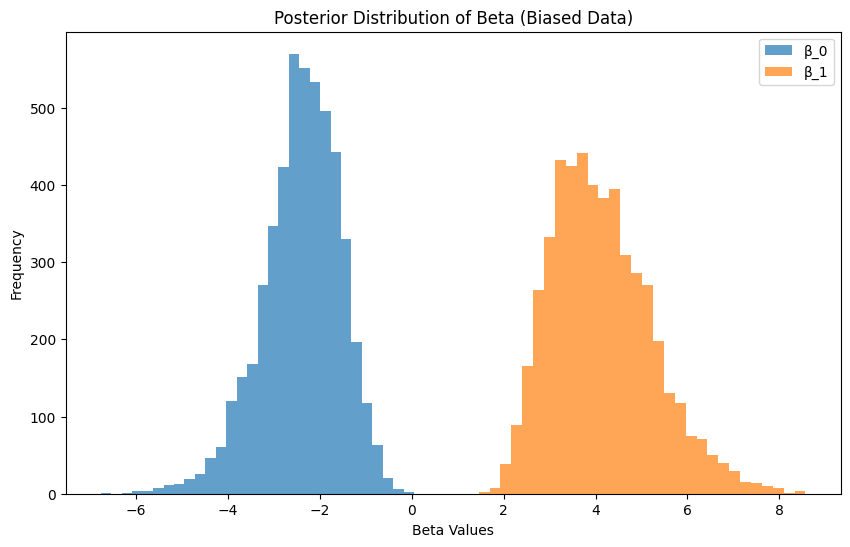

Betaの平均: [-2.40277348  4.13366231]
Betaの標準偏差: [0.85368064 1.10013926]


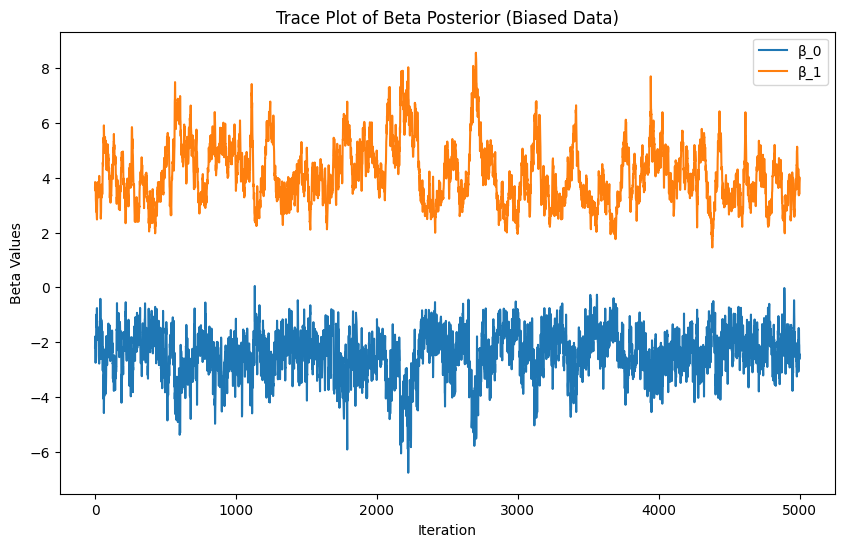

In [2]:
# 特徴量の数を設定
n_features = 1

# 特徴量の平均と標準偏差を設定
X_mu = [1]
X_sigma = [3]

# パラメータの平均と標準偏差を設定
beta_mu = [-2,3]
beta_sigma = [0.5,0.5]

# クラスをインスタンス化
generator = GenerateData_binomial(
    n_features=n_features,
    X_mu_list=X_mu,
    X_sigma_list=X_sigma,
    beta_mu=beta_mu, # beta_mu_matrixをbeta_muに変更
    beta_sigma=beta_sigma # beta_sigma_matrixをbeta_sigmaに変更
)

# データを生成
X, y = generator.generate_non_bias_data()
X_bias, y_bias = generator.generate_bias_data(n_samples=100, X_features_bias= 1 , threshfold= 1,sample_type="linear")

# yとy_biasの平均を出力
print("yの平均:", np.mean(y))
print("y_biasの平均:", np.mean(y_bias))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1行2列のサブプロットを作成

# Xのヒストグラムを描画
axes[0].hist(X[:, 1], bins=30, label='X', alpha=0.5)
axes[0].set_xlabel('X values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of X')
axes[0].legend()

# X_biasのヒストグラムを描画
axes[1].hist(X_bias[:, 1], bins=30, label='X_bias', alpha=0.5, color='orange')
axes[1].set_xlabel('X_bias values')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of X_bias')
axes[1].legend()

plt.show()

# 1次元のヒストグラムでクラス別で色分けして表示
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for cls in range(2): # クラス数は2
    X_cls = X_bias[y_bias == cls]
    plt.hist(X_cls[:, 1], label=f'Class {cls}', alpha=0.7, bins=20)
plt.title('Histogram of Feature X_1 by Class (Biased Data)')
plt.xlabel('Feature X_1')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
for cls in range(2): # クラス数は2
    X_cls = X[y == cls]
    plt.hist(X_cls[:, 1], label=f'Class {cls}', alpha=0.7, bins=20)
plt.title('Histogram of Feature X_1 by Class (Non-Biased Data)')
plt.xlabel('Feature X_1')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

b_0 = np.array([0.001, 0.001])
B_0 = np.array([np.diag([100, 100])]) # B_0の形状を変更

burn = 2000
draw = 5000

# proposed_method_binomialのインスタンスを作成
method = proposed_method_binomial(X_bias, y_bias, b_0, B_0, X_mu, X_sigma, burn, draw) # proposed_methodをproposed_method_binomialに変更

# sample_betaメソッドを実行
beta_posterior = method.sample_beta()

# 事後分布の可視化
plt.figure(figsize=(10, 6))
for i in range(beta_posterior.shape[1]):
    plt.hist(beta_posterior[:, i], bins=30, alpha=0.7, label=f'β_{i}')
plt.title('Posterior Distribution of Beta (Biased Data)')
plt.xlabel('Beta Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 平均と標準偏差の表示
beta_mean = np.mean(beta_posterior, axis=0)
beta_std = np.std(beta_posterior, axis=0)
print("Betaの平均:", beta_mean)
print("Betaの標準偏差:", beta_std)

# 事後分布のトレースプロット
plt.figure(figsize=(10, 6))
for i in range(beta_posterior.shape[1]):
    plt.plot(beta_posterior[:, i], label=f'β_{i}')
plt.title('Trace Plot of Beta Posterior (Biased Data)')
plt.xlabel('Iteration')
plt.ylabel('Beta Values')
plt.legend()
plt.show()


numpy.float64

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 多項ロジスティック回帰モデルをインスタンス化
model = LogisticRegression(solver='lbfgs', max_iter=1000, fit_intercept=True)

# モデルを訓練データで訓練
model.fit(X_train, y_train)

# パラメータを推定
estimated_beta = model.coef_
estimated_intercept = model.intercept_

print("推定されたパラメータ (beta):\n", estimated_beta)
print("推定された切片 (intercept):\n", estimated_intercept)

# テストデータで予測精度を評価
score = model.score(X_test, y_test)
print("テストデータでの正解率:", score)

推定されたパラメータ (beta):
 [[-5.84299567e-04 -2.57916507e+00]]
推定された切片 (intercept):
 [0.17281794]
テストデータでの正解率: 0.9


In [16]:
import pandas as pd
import numpy as np

# データフレーム作成
data = {
    "id": range(1, 11),
    "feature": [1, 3, 2, 5, 7, 4, 6, 8, 9, 10],  # サンプリング対象の特徴量
}
df = pd.DataFrame(data)

# 閾値の設定
threshold = 5

# 重みの計算：閾値より大きい場合は重みを高く設定
weights = np.where(df["feature"] > threshold, df["feature"], 1)
weights = weights / weights.sum()  # 正規化

# サンプリング実行
sampled_df = df.sample(n=5, weights=weights, random_state=42)

print("サンプリング結果:")
print(sampled_df)

サンプリング結果:
   id  feature
6   7        6
9  10       10
8   9        9
4   5        7
2   3        2


In [17]:
weights = np.where(df["feature"] > threshold, df["feature"], 1)
weights

array([ 1,  1,  1,  1,  7,  1,  6,  8,  9, 10])

In [18]:
import pandas as pd
import numpy as np

# データフレーム作成
data = {
    "id": range(1, 11),
    "feature": [1, 3, 2, 5, 7, 4, 6, 8, 9, 10],  # サンプリング対象の特徴量
}
df = pd.DataFrame(data)

# 閾値の設定
threshold = 5

# グループごとに重みを計算
df["group"] = np.where(df["feature"] > threshold, "above", "below")
group_counts = df["group"].value_counts()

# グループ内で均等になるように重みを設定
weights = df["group"].apply(lambda x: 1 / group_counts[x])
weights = weights / weights.sum()  # 正規化

# サンプリング実行
sampled_df = df.sample(n=5, weights=weights, random_state=42)

print("サンプリング結果:")
print(sampled_df)

サンプリング結果:
   id  feature  group
3   4        5  below
9  10       10  above
7   8        8  above
5   6        4  below
1   2        3  below


In [21]:
# データフレーム作成
data = {
    "id": range(1, 11),
    "feature": [1, 3, 2, 5, 7, 4, 6, 8, 9, 10],  # サンプリング対象の特徴量
}
df = pd.DataFrame(data)

# 閾値の設定
threshold = 5
df["group"] = np.where(df["feature"] > threshold, "above", "below")
group_counts = df["group"].value_counts()

weights = df["group"].apply(lambda x: 1 / group_counts[x])
weights

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
6    0.2
7    0.2
8    0.2
9    0.2
Name: group, dtype: float64

In [23]:
group_counts

group
below    5
above    5
Name: count, dtype: int64

In [26]:
a = np.array([0,0,0])
a.

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'